## 形态学转换
<font size=5 color='red'> 需要保留的部分为1</font>
### 腐蚀
卷积核沿着图像滑动，如果与卷积核对应的原图像的所有像素值都是 1，那么中心元素就保持原来的像素值，否则就变为0  
**前景是1  
腐蚀会扩大0的面积  
去掉白噪声**

In [33]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
cimg = cv2.imread('../images/corns.jpg')
gimg = cv2.cvtColor(cimg,cv2.COLOR_BGR2GRAY)
rgimg=abs(255-gimg)

Text(0.5,1,'reverse oringinal                    erosion')

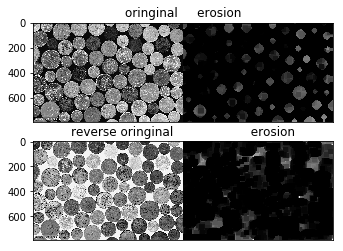

In [42]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(gimg,kernel,iterations = 10)
im=np.hstack((gimg,erosion))
rerosion = cv2.erode(rgimg,kernel,iterations = 10)
rim=np.hstack((rgimg,rerosion))
plt.subplot(211)
plt.imshow(im,'gray')
plt.title('oringinal     erosion')
plt.xticks([])
plt.subplot(212)
plt.imshow(rim,'gray')
plt.xticks([])
plt.title('reverse oringinal                    erosion')

### 膨胀
去噪声时**先腐蚀再膨胀  ------>开运算  
连接两个分开的物体  
扩大1的面积**

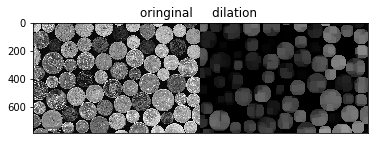

In [43]:
dilation = cv2.dilate(erosion,kernel,iterations = 10)
im=np.hstack((gimg,dilation))
plt.imshow(im,'gray')
plt.title('oringinal     dilation ')
plt.xticks([])
plt.show()

### 开运算
先腐蚀再进行膨胀---------> **去除噪声**

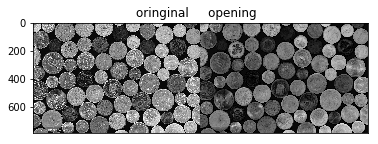

In [44]:
opening = cv2.morphologyEx(gimg, cv2.MORPH_OPEN, kernel)
im=np.hstack((gimg,opening ))
plt.imshow(im,'gray')
plt.title('oringinal     opening  ')
plt.xticks([])
plt.show()

### 闭运算 
**先膨胀再腐蚀**。它经常被用来**填充前景物体中的小洞**，或者前景物体上的**小黑点**。

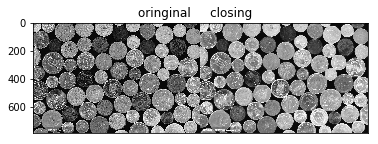

In [45]:
closing = cv2.morphologyEx(gimg, cv2.MORPH_CLOSE, kernel)
im=np.hstack((gimg,closing  ))
plt.imshow(im,'gray')
plt.title('oringinal     closing   ')
plt.xticks([])
plt.show()

### 形态学梯度
一幅图像膨胀与腐蚀的差别----->**前景物体的轮廓高亮**

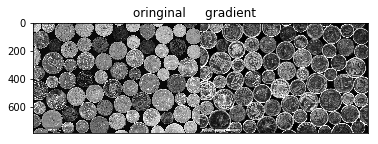

In [46]:
gradient = cv2.morphologyEx(gimg, cv2.MORPH_GRADIENT, kernel)
im=np.hstack((gimg,gradient   ))
plt.imshow(im,'gray')
plt.title('oringinal     gradient   ')
plt.xticks([])
plt.show()

### 礼帽
原始图像与进行开运算之后得到的图像的差-------> **高亮噪声**

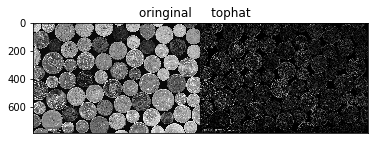

In [47]:
tophat = cv2.morphologyEx(gimg, cv2.MORPH_TOPHAT, kernel)
im=np.hstack((gimg,tophat   ))
plt.imshow(im,'gray')
plt.title('oringinal     tophat   ')
plt.xticks([])
plt.show()

### 黑帽
闭运算之后得到的图像与原始图像的差--------> **暗噪声**

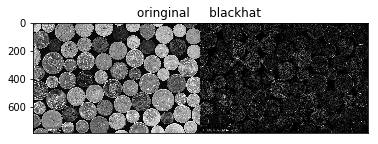

In [48]:
blackhat = cv2.morphologyEx(gimg, cv2.MORPH_BLACKHAT, kernel)
im=np.hstack((gimg,blackhat))
plt.imshow(im,'gray')
plt.title('oringinal     blackhat ')
plt.xticks([])
plt.show()

### 形态学操作之间的关系
<img src='xintai.png' > 

### 结构化元素
**cv2.getStructuringElement--------->构建特殊形状的核 **

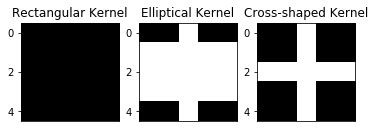

In [50]:
# Rectangular Kernel
rect_kenerl=cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
'''
array([[1, 1, 1, 1, 1],
[1, 1, 1, 1, 1],
[1, 1, 1, 1, 1],
[1, 1, 1, 1, 1],
[1, 1, 1, 1, 1]], dtype=uint8)
'''
# Elliptical Kernel
relip_kenerl=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
'''
array([[0, 0, 1, 0, 0],
[1, 1, 1, 1, 1],
[1, 1, 1, 1, 1],
[1, 1, 1, 1, 1],
[0, 0, 1, 0, 0]], dtype=uint8)
'''
# Cross-shaped Kernel
cros_kenerl= cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
'''
array([[0, 0, 1, 0, 0],
[0, 0, 1, 0, 0],
[1, 1, 1, 1, 1],
[0, 0, 1, 0, 0],
[0, 0, 1, 0, 0]], dtype=uint8)
'''
plt.subplot(131)
plt.imshow(rect_kenerl,'gray')
plt.title('Rectangular Kernel')
plt.xticks([])

plt.subplot(132)
plt.imshow(relip_kenerl,'gray')
plt.title('Elliptical Kernel')
plt.xticks([])

plt.subplot(133)
plt.imshow(cros_kenerl,'gray')
plt.title('Cross-shaped Kernel')
plt.xticks([])
plt.show()


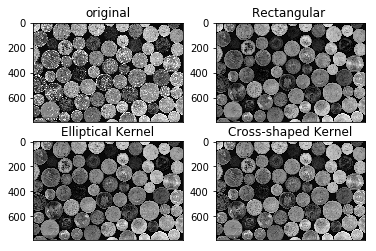

In [51]:
opening1 = cv2.morphologyEx(gimg, cv2.MORPH_OPEN, rect_kenerl)
opening2 = cv2.morphologyEx(gimg, cv2.MORPH_OPEN, relip_kenerl)
opening3 = cv2.morphologyEx(gimg, cv2.MORPH_OPEN, cros_kenerl)

im=np.hstack((opening1 ,opening2,opening3 ))
plt.subplot(221)
plt.imshow(gimg,'gray')
plt.title('original')
plt.xticks([])
plt.subplot(222)
plt.imshow(opening1,'gray')
plt.title('Rectangular ')
plt.xticks([])
plt.subplot(223)
plt.imshow(opening2,'gray')
plt.title('Elliptical Kernel')
plt.xticks([])
plt.subplot(224)
plt.imshow(opening3,'gray')
plt.title('Cross-shaped Kernel')
plt.xticks([])

plt.show()

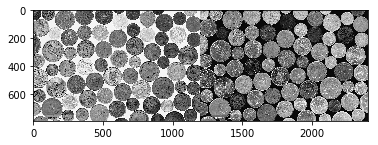

In [34]:
plt.imshow(np.hstack((rgimg,gimg)),'gray')

## 图像金字塔
同一图像的不同分辨率的子图集合
1. 高斯金字塔  
顶部图像中的每个像素值等于下一层图像中 5 个像素的高斯加权平均值, **每次尺寸降为0.5**  
lower_reso = cv2.pyrDown(higher_reso)  
higher_reso2 = cv2.pyrUp(lower_reso)  
2. 拉普拉斯金字塔  
由高斯计算来：
$$L_i=G_i-PyrUp(Gi+1)$$
像边界图， 用于图像压缩

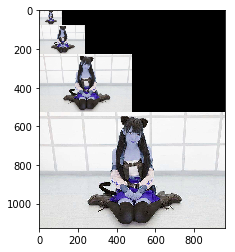

In [79]:
# generate Gaussian pyramid for cimg
cyrm_img=cv2.imread('../images/yaorenmao.jpeg')
G = cyrm_img.copy()
gpA = [G]
imgpA=G
for i in range(3):
    G = cv2.pyrDown(G)
    constant= cv2.copyMakeBorder(G,0,0,0,cyrm_img.shape[1]-G.shape[1],cv2.BORDER_CONSTANT,value=[0,0,0])
    gpA.append(G)
    imgpA=np.vstack((constant,imgpA))
plt.imshow(imgpA)

3
2
1


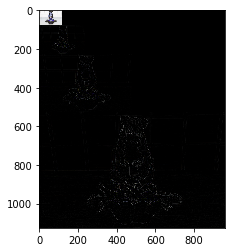

In [96]:
lpA=[gpA[-1]]
imlpA= cv2.copyMakeBorder(G,0,0,0,cyrm_img.shape[1]-gpA[-1].shape[1],cv2.BORDER_CONSTANT,value=[0,0,0])
for i in range(len(gpA)-1,0,-1):
    print(i)
    GE=cv2.pyrUp(gpA[i])
    L=cv2.subtract(gpA[i-1],GE)
    lpA.append(L)
    constant= cv2.copyMakeBorder(L,0,0,0,cyrm_img.shape[1]-L.shape[1],cv2.BORDER_CONSTANT,value=[0,0,0])
    imlpA=np.vstack((imlpA,constant))
plt.imshow(imlpA) 


###  使用金字塔进行图像融合
 实现图像的无缝拼接
1. 读入两幅图像
2. 构建各自的高斯金字塔（6 层）
3. 根据高斯金字塔计算拉普拉斯金字塔
4. 在拉普拉斯的每一层进行图像融合 （第一幅的左边与第二幅右边）
5. 根据融合后的图像金字塔重建原始图像
**在融合的时候可能会有尺寸不匹配的问题， 例如 270--->135 ----->68 回来的时候 68--------->136---->272**

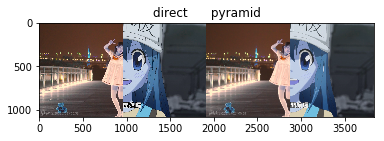

In [118]:
A=cv2.imread('../images/yrm.jpg')
B=cv2.imread('../images/xxb.jpg')
timen=3
# generate Gaussian pyramid for A
G = A.copy()
gpA = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpA.append(G)
# generate Gaussian pyramid for B
G = B.copy()
gpB = [G]
for i in range(timen):
    G = cv2.pyrDown(G)
    gpB.append(G)
# generate Laplacian Pyramid for A
lpA = [gpA[timen-1]]
for i in range(timen-1,0,-1):
    GE = cv2.pyrUp(gpA[i])
    L = cv2.subtract(gpA[i-1],GE)
    lpA.append(L)
# generate Laplacian Pyramid for B
lpB = [gpB[timen-1]]
for i in range(timen-1,0,-1):
    GE = cv2.pyrUp(gpB[i])
    L = cv2.subtract(gpB[i-1],GE)
    lpB.append(L)
# Now add left and right halves of images in each level
#numpy.hstack(tup)
#Take a sequence of arrays and stack them horizontally
#to make a single array.
LS = []
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:cols//2], lb[:,cols//2:]))
    LS.append(ls)
# now reconstruct
ls_ = LS[0] #最小的
for i in range(1,timen):
    ls_ = cv2.pyrUp(ls_)
    ls_ = cv2.add(ls_, LS[i])
# image with direct connecting each half
real = np.hstack((A[:,:cols//2],B[:,cols//2:]))
im=np.hstack((real,ls_))
plt.imshow(im)
plt.title('direct      pyramid')
plt.show()

In [119]:
cv2.namedWindow('image',cv2.WINDOW_NORMAL)# 默认值是cv2.WINDOW_AUTOSIZE
cv2.imshow('image',im) # 这里的title需要与之前创建的窗口名字一致，不然会再新建一个窗口
cv2.waitKey(0)
cv2.destroyAllWindows()

## 轮廓
- 在寻找轮廓之前，要进行阈值化处理或者 Canny 边界检测
- 查找轮廓的函数会修改原始图像
- 要找的物体应该是白色而背景应该是黑色  
**图像,轮廓[np.array(坐标)],（轮廓的）层析结构=cv2.findContours(图像,轮廓检索模式,轮廓近似方法)**  


绘制轮廓  
    
    **cv2.drawContours(原始图像，轮廓，轮廓的索引 （-1 时绘制所有轮廓）轮廓的颜色和厚度)**

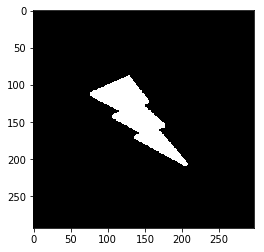

In [453]:
ori_test=cv2.imread('../images/conter.jpg')
imgray = cv2.cvtColor(ori_test,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,80,255,0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(image,'gray')

True

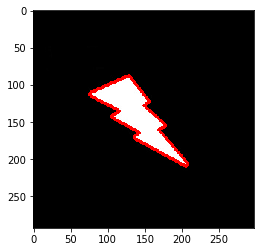

In [454]:
b,g,r=cv2.split(ori_test)
pltA=cv2.merge([r,g,b])# 合并
countour_cimg = cv2.drawContours(pltA.copy(), contours, 0, (255,0,0), 3)
plt.imshow(countour_cimg)
cv2.imwrite('../images/conte.jpg',pltA)


#### 轮廓的近似方法参数设置------->告诉cv2.findContours 该储存什么样的边界点
轮廓是一个形状具有相同灰度值的边界
cv2.CHAIN_APPROX_NONE ： 有的边界点都会被存储
cv2.CHAIN_APPROX_SIMPLE： 将轮廓上的冗余点都去掉（直线只保留两端坐标）


## 轮廓特征
### 矩 dict=cv2.moments() 
图像的矩可以帮助我们计算图像的质心，面积等

In [455]:
cnt = contours[0]
M = cv2.moments(cnt)
print(M) 

{'m00': 4898.0, 'm10': 682008.5, 'm01': 690622.8333333333, 'm20': 98529348.83333333, 'm11': 99251633.41666666, 'm02': 101476733.16666666, 'm30': 14724041466.650002, 'm21': 14787358098.266666, 'm12': 15046372656.133333, 'm03': 15501958840.550001, 'mu20': 3564956.4135190994, 'mu11': 3087761.9124982804, 'mu02': 4098232.1618971527, 'mu30': 11809013.383871078, 'mu21': 34728903.010400414, 'mu12': 45769893.120833516, 'mu03': 37929769.17630386, 'nu20': 0.14859926550295277, 'nu11': 0.1287082081860014, 'nu02': 0.17082797613150463, 'nu30': 0.0070334217944626335, 'nu21': 0.020684456473285668, 'nu12': 0.027260445334576163, 'nu03': 0.022590885157935312}


In [186]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

#### 面积 周长
**cv2.contourArea() ** or **M['m00']**  
perimeter = cv2.arcLength(cnt,True)  
Ture: 闭合曲线

In [456]:
area = cv2.contourArea(cnt)
perimeter = cv2.arcLength(cnt,True)  

print('面积：  {}， 周长：  {}'.format(area, perimeter))

面积：  4898.0， 周长：  440.1564155817032


#### 轮廓近似
将轮廓形状近似到另外一种由更少点组成的轮廓形状，采用Douglas-Peucker算法
**cv2.approxPolyDP(轮廓,epsilon,True)**  
epsilon： 从原始轮廓到近似轮廓的最大距离, 越小越接近原始形状
Ture: 闭合曲线

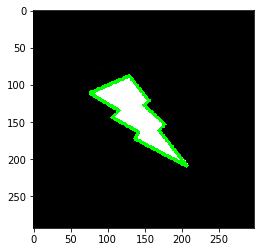

In [457]:
epsilon = 0.01*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
countour_cimg = cv2.drawContours(pltA.copy(), [approx] , -1, (0,255,0), 3)
plt.imshow(countour_cimg)

####  凸包
用非凹陷的曲线包围轮廓，凹进去的部分是凹陷缺陷
hull = cv2.convexHull(轮廓[, hull[, clockwise[, returnPoints]]
clockwise： Ture------> 顺时针凸包   
returnPoints： True---------->凸包上点的坐标  
                         False--------->与凸包点对应的轮廓上的点的索引


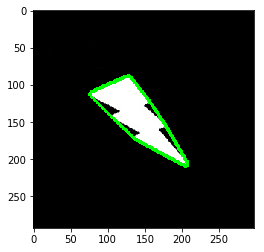

In [458]:
hull = cv2.convexHull(cnt)
countour_cimg = cv2.drawContours(pltA.copy(), [hull ] , -1, (0,255,0), 3)
plt.imshow(countour_cimg)

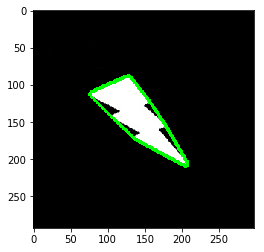

In [459]:
hull = cv2.convexHull(cnt, returnPoints =False)
countour_cimg = cv2.drawContours(pltA.copy(), [cnt[hull].reshape(-1,1,2)] , -1, (0,255,0), 3)
plt.imshow(countour_cimg)

#### 凸性检测
 cv2.isContourConvex() 可以可以用来检测一个曲线是不是凸
的。它只能返回 True 或 False

In [460]:
k = cv2.isContourConvex(cnt)
k

False

####  边界矩形
1. 直边界矩形 **cv2.boundingRect()**   
        没有旋转的就行， 所以边界矩形的面积不是最小的
2. 旋转的边界矩形  **cv2.minAreaRect()**--------->Box2D 结构

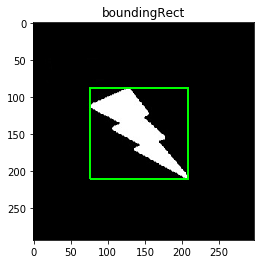

In [464]:
x,y,w,h = cv2.boundingRect(cnt)
pimg = cv2.rectangle(pltA.copy(),(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(pimg)
plt.title('boundingRect')
plt.show()

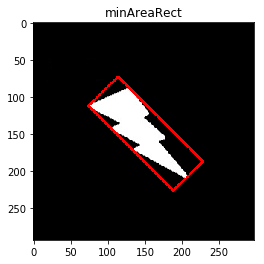

In [478]:
left_up,width_height,rotate_theta = cv2.minAreaRect(cnt)
rect_pts=cv2.boxPoints((left_up,width_height,rotate_theta)) # get rect corordinate
pimg =cv2.polylines(pltA.copy(),[np.int32(rect_pts)],True,(2550,0),2)
plt.imshow(pimg)
plt.title('minAreaRect')
plt.show()

#### 最小外接圆

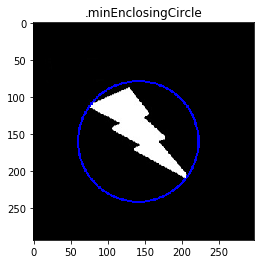

In [479]:
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
pimg = cv2.circle(pltA.copy(),center,radius,(0,0,255),2)
plt.imshow(pimg)
plt.title('.minEnclosingCircle')
plt.show()

#### 椭圆拟合
旋转边界矩形的内切圆

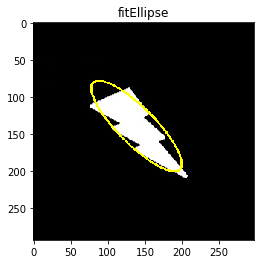

In [481]:
ellipse = cv2.fitEllipse(cnt)
im = cv2.ellipse(im,ellipse,(0,255,0),2)
pimg =  cv2.ellipse(pltA.copy(),ellipse,(255,255,0),2)
plt.imshow(pimg)
plt.title('fitEllipse')
plt.show()

#### 直线拟合

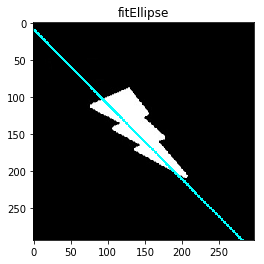

In [484]:

rows,cols = pltA.copy().shape[:2]
#cv2.fitLine(points, distType, param, reps, aeps[, line ]) → line
#points – Input vector of 2D or 3D points, stored in std::vector<> or Mat.
#line – Output line parameters. In case of 2D fitting, it should be a vector of
#4 elements (likeVec4f) - (vx, vy, x0, y0), where (vx, vy) is a normalized
#vector collinear to the line and (x0, y0) is a point on the line. In case of
#3D fitting, it should be a vector of 6 elements (like Vec6f) - (vx, vy, vz,
#x0, y0, z0), where (vx, vy, vz) is a normalized vector collinear to the line
#and (x0, y0, z0) is a point on the line.
#distType – Distance used by the M-estimator
#distType=CV_DIST_L2
#ρ(r) = r2 /2 (the simplest and the fastest least-squares method)
#param – Numerical parameter ( C ) for some types of distances. If it is 0, an optimal value
#is chosen.
#reps – Sufficient accuracy for the radius (distance between the coordinate origin and the
#line).
#aeps – Sufficient accuracy for the angle. 0.01 would be a good default value for reps and
#aeps.
[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
pimg = cv2.line(pltA.copy(),(cols-1,righty),(0,lefty),(0,255,255),2)
plt.imshow(pimg)
plt.title('fitEllipse')
plt.show()

### 轮廓的性质
#### 长宽比
$$矩形边界的宽高比=\frac{width}{height}$$

$$Extent = \frac{轮廓所围面积}{边界矩形面积}$$

$$Solidity = \frac{轮廓面积}{凸包面积}$$

Equivalent Diameter  
$$轮廓面积相等的圆形的直径= \sqrt{\frac{4*轮廓面积}{\pi}}$$


In [485]:
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h

# extent
area = cv2.contourArea(cnt)
rect_area = w*h
extent = float(area)/rect_area


hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
solidity = float(area)/hull_area


equi_diameter = np.sqrt(4*area/np.pi)

# 对象的方向   返回长轴和短轴的长度
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)

## 分水岭算法图像分割
 OpenCV 采用了基于掩模的分水岭算法，在这种算法中我们要设置那些山谷点会汇合，那些不会,我们要做的就是给我们已知的对象打上不同的标签。如果某个区域肯定是前景或对象，就使用某个颜色（或灰度值）标签标记它。如果某个区域肯定不是对象而是背景就使用另外一个颜色标签标记。而剩下的不能确定是前景还是背景的区域就用 0 标记  
 
 每一次灌水，我们的标签就会被更新，当两个不同颜色的标签相遇时就构建堤坝，直到将所有山峰淹没，最后我们得到的边界对象（堤坝）的值为 -1

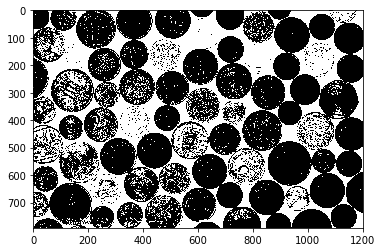

In [12]:
ret, thresh = cv2.threshold(gimg,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh,'gray')

In [316]:
ori_xyt1=cv2.imread('../images/xueyating.jpg')
ori_xyt2=cv2.imread('../images/xyt.jpg')
ori_simg=cv2.imread('../images/stanford.jpg')
height,width=ori_xyt1.shape[:2]
rs_xyt2=cv2.resize(ori_xyt2,(int(width),int(height)),interpolation= cv2.INTER_CUBIC)
rs_simg=cv2.resize(ori_simg,(int(width),int(height)),interpolation= cv2.INTER_CUBIC)

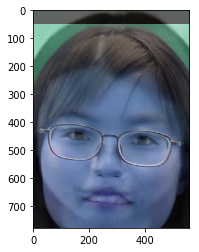

In [325]:
d=50
pxyt1= cv2.copyMakeBorder(ori_xyt1.copy(),d,0,0,0,cv2.BORDER_CONSTANT,value=[0,0,0])
cxyt1=pxyt1[:-d,:]
plt.imshow(cxyt1)
himage=np.hstack((rs_simg,cxyt1))
weightIma=cv2.addWeighted(cxyt1,0.5,rs_simg,0.5,0)
plt.imshow(weightIma)

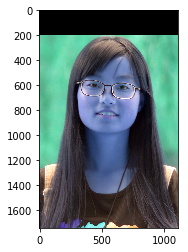